In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [5]:
df.shape

(200, 5)

In [6]:
df.describe().T
# df.describe(include = "all", percentiles = [.1, .25, .5, .75, .95])

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.drop(columns=['CustomerID'],axis=1,inplace=True)

In [9]:
df.Gender.replace('Male',0, inplace=True)
df.Gender.replace('Female',1, inplace=True)

In [10]:
df.sample(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
138,0,19,74,10
101,1,49,62,48
50,1,49,42,52
174,1,52,88,13
19,1,35,23,98


In [11]:
df.Gender.dtype

dtype('int64')

**EDA**

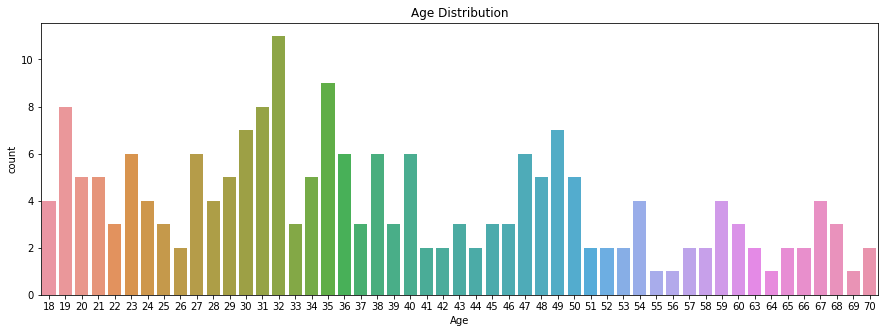

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

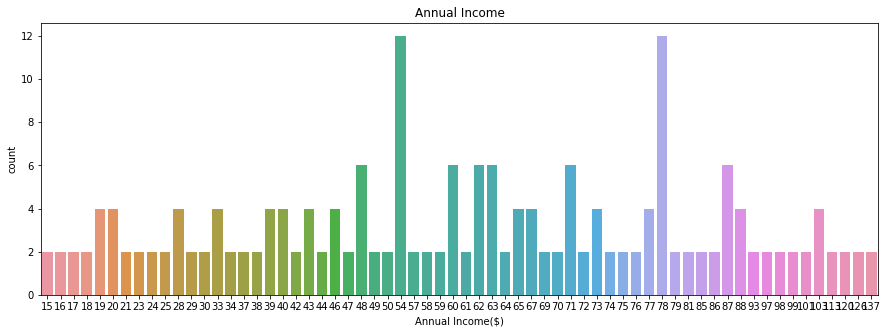

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(df['Annual Income (k$)'])
plt.title('Annual Income')
plt.xlabel('Annual Income($)')
plt.show()

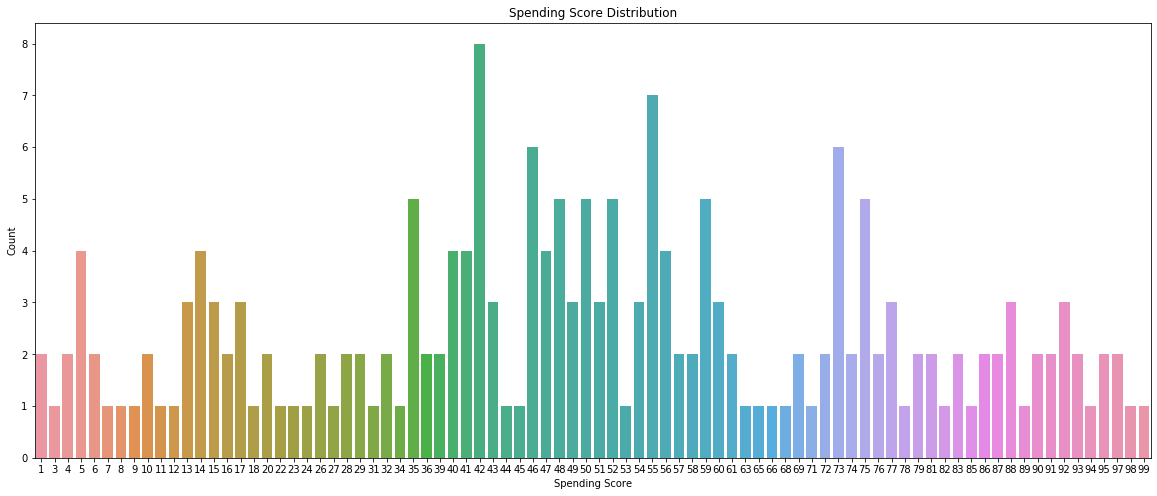

In [19]:
plt.figure(figsize=(20,8))
sns.countplot(df['Spending Score (1-100)'])
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.axis()
plt.show()

Text(0, 0.5, 'Count')

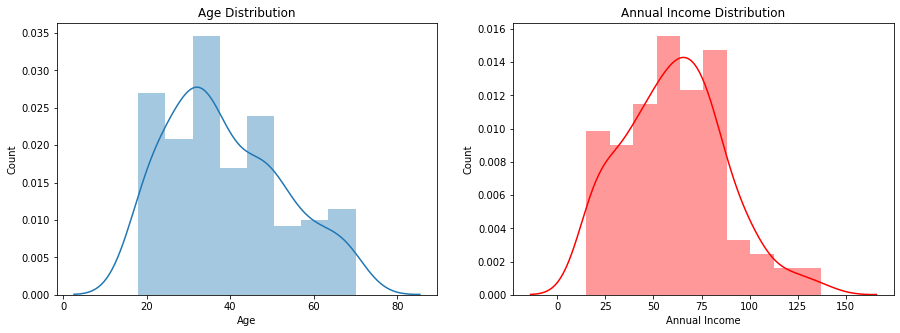

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.subplot(1,2,2)
sns.distplot(df['Annual Income (k$)'],color='red')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')

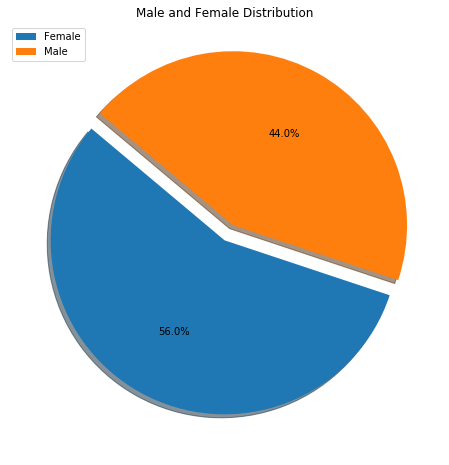

In [22]:
plt.figure(figsize=(8,8))
explode = [0,0.1]
plt.pie(df['Gender'].value_counts(),explode=explode,autopct='%1.1f%%',shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off');

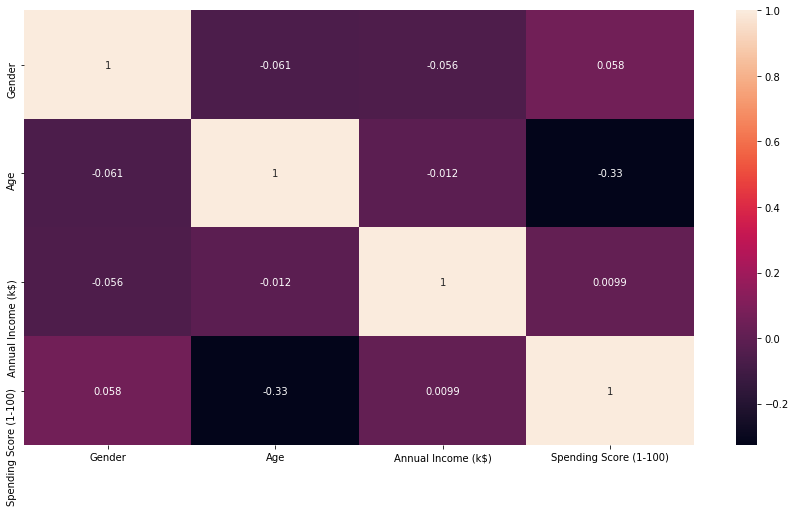

In [30]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True)
plt.show();

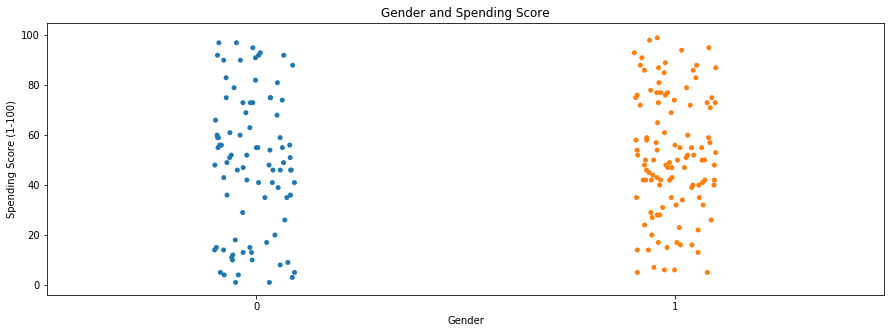

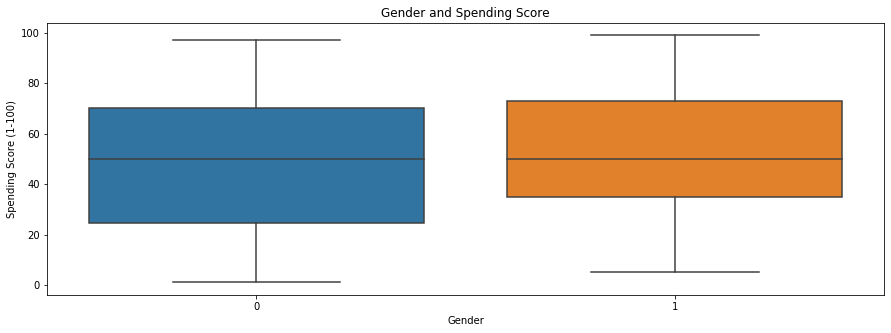

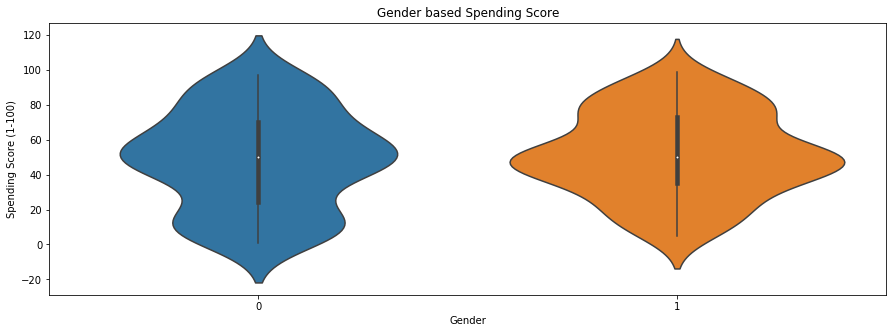

In [24]:
plt.figure(figsize=(15,5))
sns.stripplot(df['Gender'], df['Spending Score (1-100)'])
plt.title('Gender and Spending Score')
plt.show()
plt.figure(figsize=(15,5))
sns.boxplot(df['Gender'], df['Spending Score (1-100)'])
plt.title('Gender and Spending Score')
plt.show()
plt.figure(figsize=(15,5))
sns.violinplot(df['Gender'],df['Spending Score (1-100)'])
plt.title('Gender based Spending Score')
plt.show()


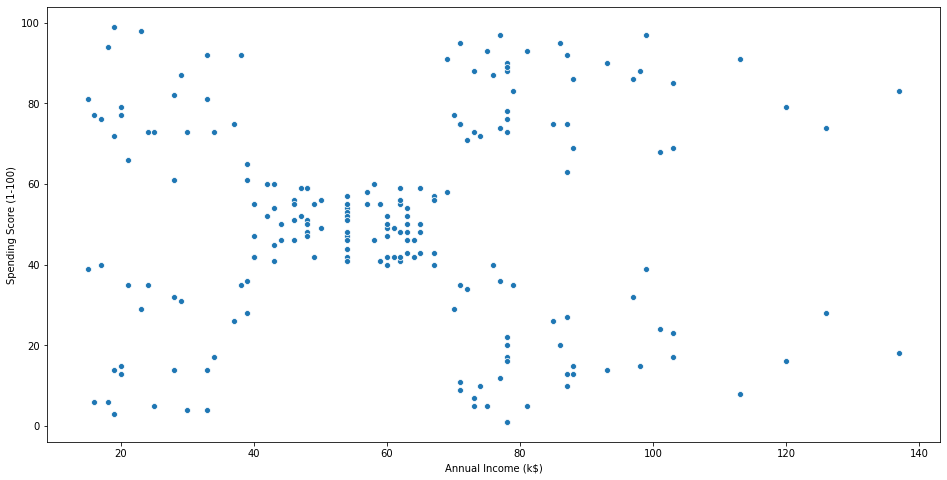

In [27]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], ax=ax)
plt.show();

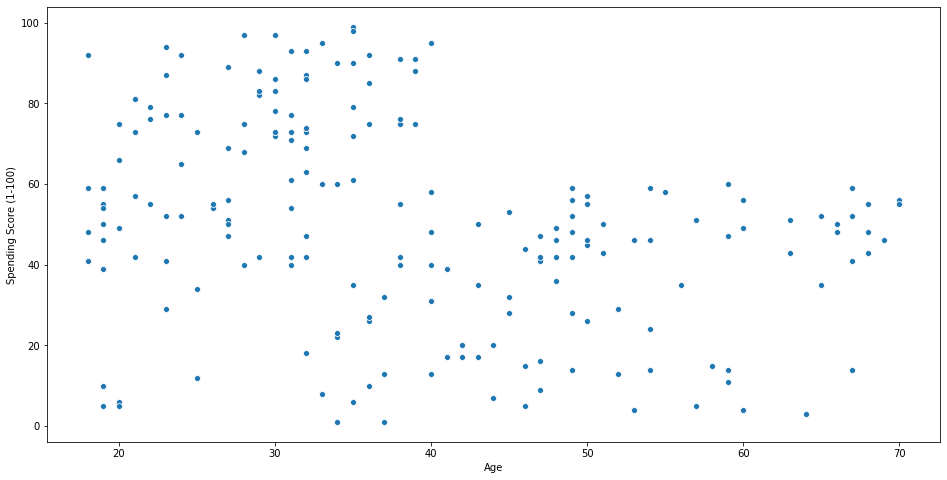

In [28]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(df['Age'], df['Spending Score (1-100)'], ax=ax)
plt.show()

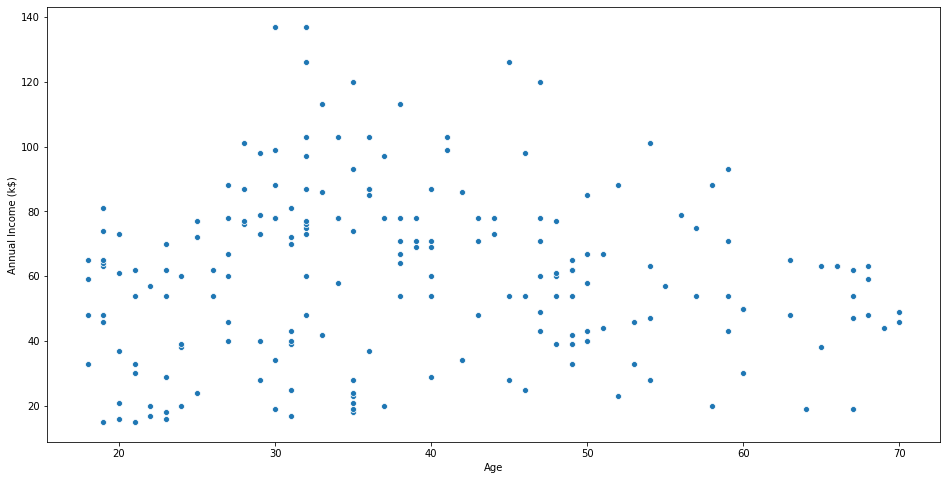

In [29]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(df['Age'], df['Annual Income (k$)'], ax=ax)
plt.show()

**Cluster Analysis**

In [32]:
df1 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [33]:
df1.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

In [34]:
df1.head(3)

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6


Hopkins Statistic

In [35]:
from pyclustertend import hopkins
hopkins(df1,df1.shape[0])

0.3150465006607841

In [ ]:
# projeden farkli olarak age eklenmis - cluster sayisi degisti

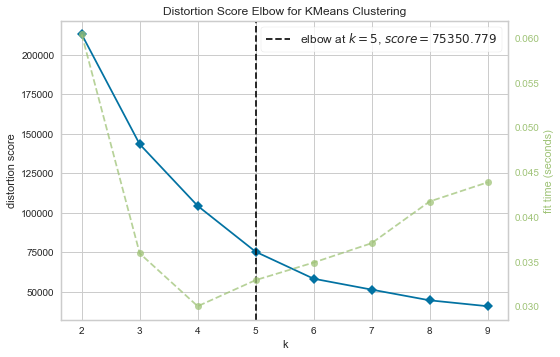

In [37]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df1)
visu.poof();

In [38]:
kmeans = KMeans(n_clusters = 5)
y_means = kmeans.fit_predict(df1)

In [39]:
df1['cluster_Kmeans'] = y_means

In [40]:
df1.sample(8)

,Age,Annual_Income,Spending_Score,cluster_Kmeans
20,35,24,35,4
24,54,28,14,4
82,67,54,41,0
198,32,137,18,3
77,40,54,48,0
87,22,57,55,0
81,38,54,55,0
110,65,63,52,0


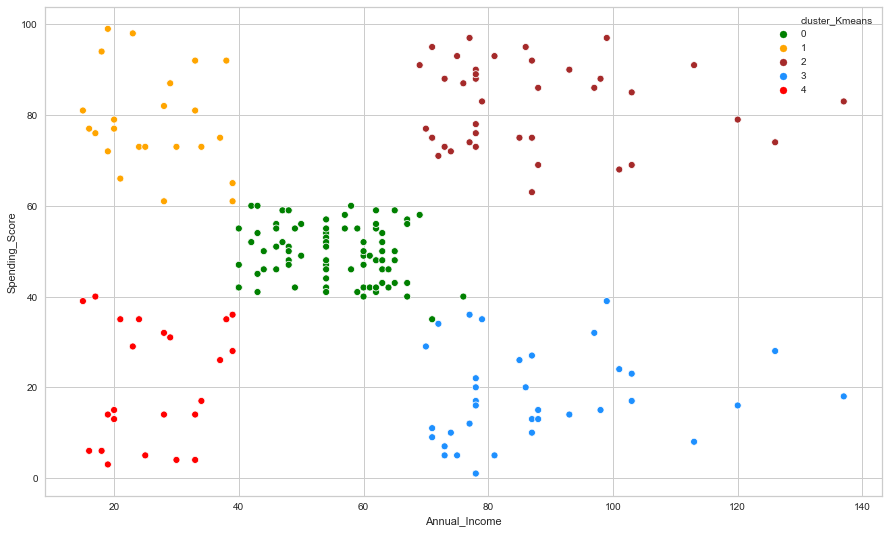

In [41]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Kmeans', data=df1, palette=['green','orange','brown','dodgerblue', 'red'], legend='full')

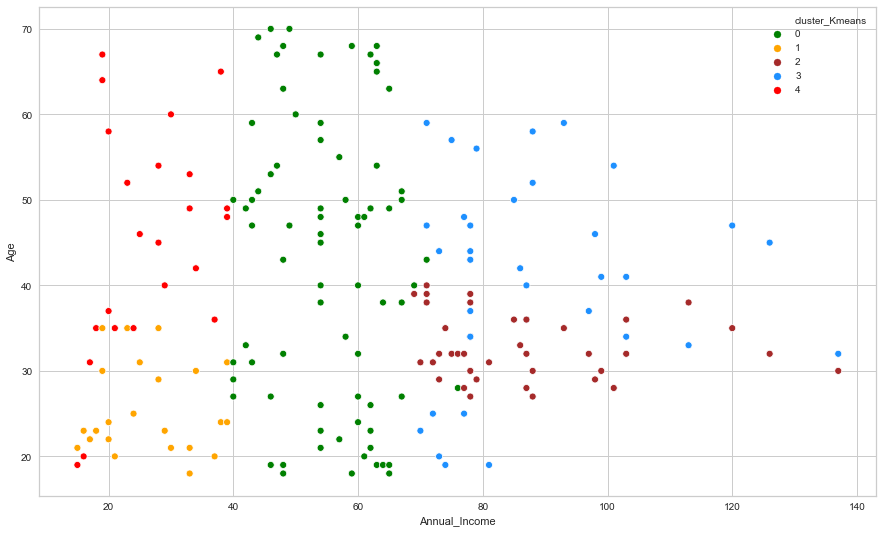

In [42]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Annual_Income', y='Age', hue='cluster_Kmeans', data=df1, palette=['green','orange','brown','dodgerblue', 'red'], legend='full')

In [43]:
from sklearn.metrics import silhouette_score
silhouette_score(df1.drop("cluster_Kmeans", axis=1), y_means)

0.44428597560893024

**Hierarchical Clustering**

In [44]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [45]:
hc_complete = linkage(df1, "complete")
hc_ward = linkage(df1, "ward")

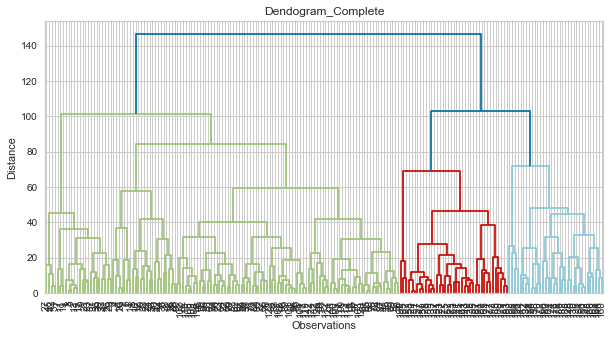

In [46]:
plt.figure(figsize = (10,5))
plt.title("Dendogram_Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete,
          leaf_font_size = 10);

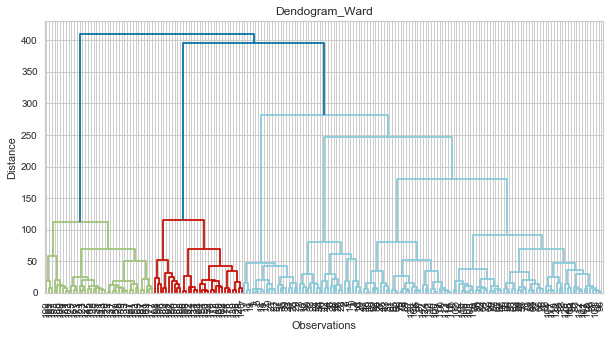

In [48]:
plt.figure(figsize = (10,5))
plt.title("Dendogram_Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward,
          leaf_font_size = 10);

In [49]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=6)
y_agg = cluster.fit_predict(df1)

In [50]:
df1['cluster2'] = y_agg
df1.sample(20)

,Age,Annual_Income,Spending_Score,cluster_Kmeans,cluster2
66,43,48,50,0,2
8,64,19,3,4,4
47,27,40,47,0,5
197,32,126,74,2,1
180,37,97,32,3,0
145,28,77,97,2,1
0,19,15,39,4,4
130,47,71,9,3,0
190,34,103,23,3,0
143,32,76,87,2,1


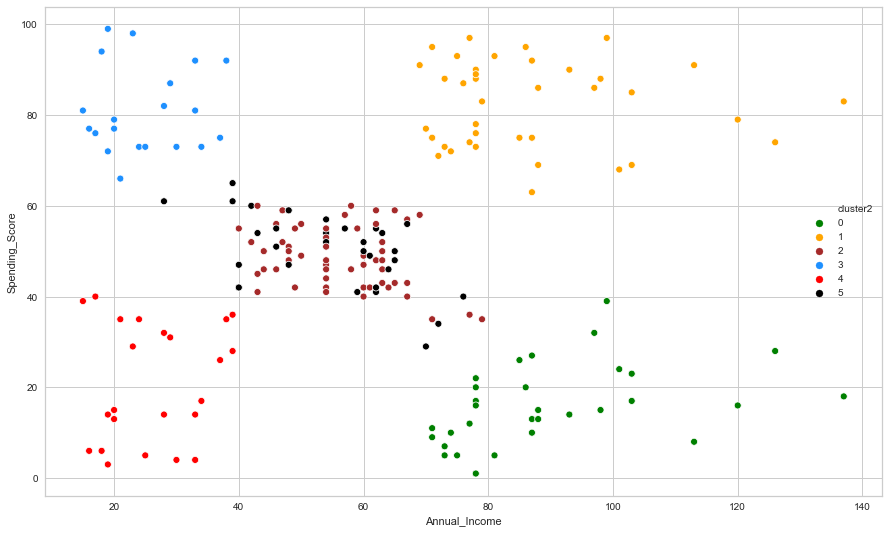

In [51]:
plt.figure(figsize=(15,9))
g=sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster2', data=df1, palette=['green','orange','brown','dodgerblue', "red", "black"], legend='full')

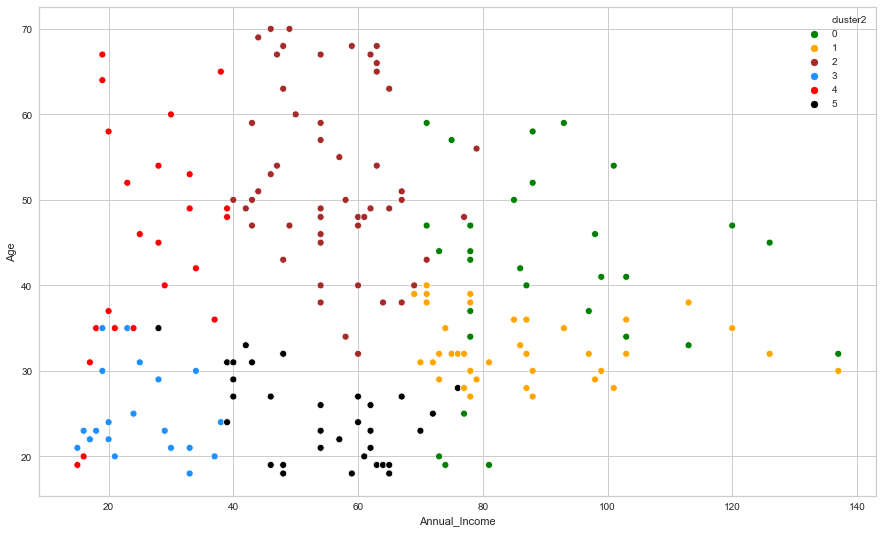

In [52]:
plt.figure(figsize=(15,9))
g=sns.scatterplot(x='Annual_Income', y='Age', hue='cluster2', data=df1, palette=['green','orange','brown','dodgerblue', "red", "black"], legend='full')

In [64]:
df['cluster']= y_agg

In [65]:
df.sample(8)

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
197,0,32,126,74,1
158,0,34,78,1,0
195,1,35,120,79,1
106,1,66,63,50,2
71,1,47,49,42,2
184,1,41,99,39,0
103,0,26,62,55,5
194,1,47,120,16,0


In [54]:
from mpl_toolkits.mplot3d import Axes3D

In [57]:
kmeans= KMeans(n_clusters=3).fit(df1)
clusters= kmeans.labels_
centers = kmeans.cluster_centers_

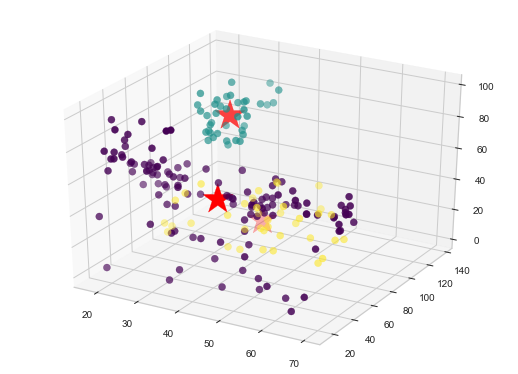

In [58]:
plt.rcParams["figure.figsize"] =(7,5)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df1.iloc[:,0],df1.iloc[:,1],df1.iloc[:,2],c = clusters, s = 50,cmap = "viridis")
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c="red",marker="*",s = 1000);

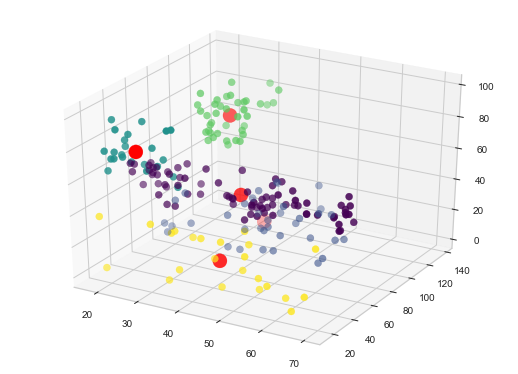

In [62]:
from mpl_toolkits.mplot3d import Axes3D
kmeans= KMeans(n_clusters=5).fit(df1)
clusters= kmeans.labels_
centers = kmeans.cluster_centers_
plt.rcParams["figure.figsize"] =(7,5)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df1.iloc[:,0],df1.iloc[:,1],df1.iloc[:,2],c = clusters, s = 50,cmap = "viridis")
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c="red",marker="o",s = 200);

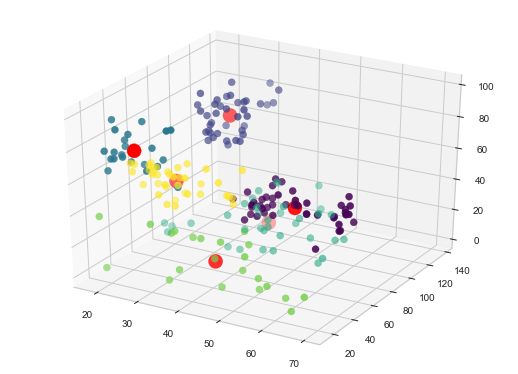

In [63]:
from mpl_toolkits.mplot3d import Axes3D
kmeans= KMeans(n_clusters=6).fit(df1)
clusters= kmeans.labels_
centers = kmeans.cluster_centers_
plt.rcParams["figure.figsize"] =(7,5)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df1.iloc[:,0],df1.iloc[:,1],df1.iloc[:,2],c = clusters, s = 50,cmap = "viridis")
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c="red",marker="o",s = 200);

In [ ]:
import plotly.graph_objs as go
import plotly as py
py.offline.init_notebook_mode(connected = True)
df3['cluster_id'] =  k_means3.labels_
trace1 = go.Scatter3d(
    x = df3['Age'],
    y = df3['Spend_score'],
    z = df3['Income'],
    mode ='markers',
    marker = dict(color = df3['cluster_id'], size = 10, line = dict(color= df3['cluster_id'], width= 8), opacity = 0.8))
data = [trace1]
layout = go.Layout(title= 'Customers\' Segmentation', scene = dict(xaxis = dict(title  = 'Age'),
                                                   yaxis = dict(title  = 'Spending Score (1-100)'),
                                                   zaxis = dict(title  = 'Annual Income (k$)')))
fig = go.Figure(data = data, layout=layout)
py.offline.iplot(fig)
plt.show();

In [69]:
pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=3f22214a589d08b75cfc2c7eb77ba3fdf85ca54b3f828b3164f9f811486d219b
  Stored in directory: c:\users\alp\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [72]:
import plotly as py
import plotly.graph_objs as go

In [73]:
py.offline.init_notebook_mode(connected = True)
df['cluster'] =  kmeans.labels_
trace1 = go.Scatter3d(
    x = df['Age'],
    y = df['Spending_Score'],
    z = df['Annual_Income'],
    mode ='markers',
    marker = dict(color = df['cluster'], size = 10, line = dict(color= df['cluster'], width= 8), opacity = 0.8)) 
data = [trace1]
layout = go.Layout(title= 'Customers\' Segmentation', scene = dict(xaxis = dict(title  = 'Age'), 
                                                   yaxis = dict(title  = 'Spending Score (1-100)'), 
                                                   zaxis = dict(title  = 'Annual Income (k$)')))
fig = go.Figure(data = data, layout=layout)
py.offline.iplot(fig)
plt.show();

KeyError: 'Spending_Score'

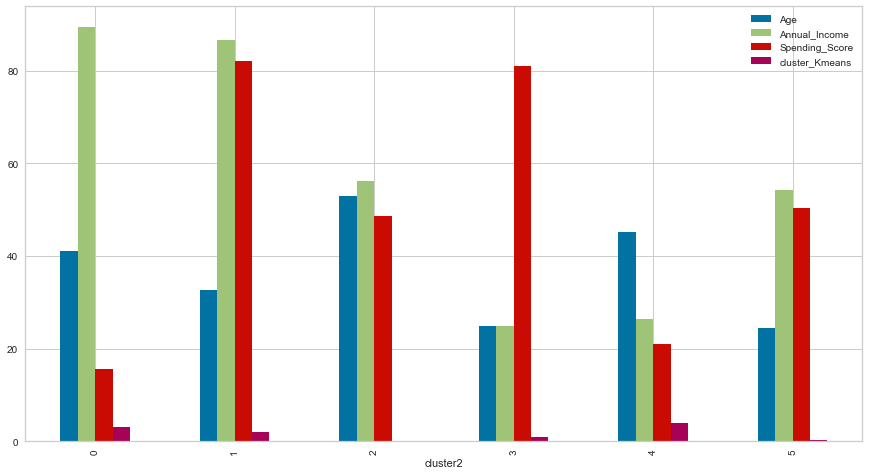

In [61]:
df1.groupby(df1.cluster2).mean().plot(figsize = (15, 8), kind='bar')
plt.show()

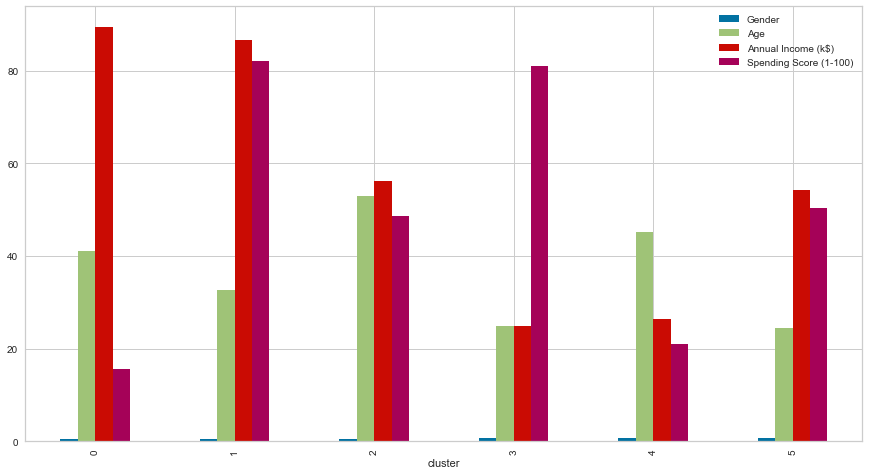

In [66]:
df.groupby(df.cluster).mean().plot(figsize = (15, 8), kind='bar')
plt.show()